# Assignment 5

## Part 1

In [199]:
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
import imblearn

In [200]:
#reading data from the new csv file
url = "imbalanced iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petalwidth',
         'class']
dataset = read_csv(url, names=names)
dataset.head(10)

,sepal-length,sepal-width,petal-length,petalwidth,class
0,sepal-length,sepal-width,petal-length,petal-width,class
1,5.4,3.7,1.5,0.2,Iris-setosa
2,4.8,3.4,1.6,0.2,Iris-setosa
3,4.8,3,1.4,0.1,Iris-setosa
4,4.3,3,1.1,0.1,Iris-setosa
5,5.8,4,1.2,0.2,Iris-setosa
6,5.7,4.4,1.5,0.4,Iris-setosa
7,5.4,3.9,1.3,0.4,Iris-setosa
8,5.1,3.5,1.4,0.3,Iris-setosa
9,5.7,3.8,1.7,0.3,Iris-setosa


In [201]:
rows, col = dataset.shape
print("Rows : %s, column : %s" % (rows, col))
type(dataset)

Rows : 121, column : 5


pandas.core.frame.DataFrame

In [202]:
features_df = dataset.iloc[1:,0:4]
features_df

,sepal-length,sepal-width,petal-length,petalwidth
1,5.4,3.7,1.5,0.2
2,4.8,3.4,1.6,0.2
3,4.8,3,1.4,0.1
4,4.3,3,1.1,0.1
5,5.8,4,1.2,0.2
...,...,...,...,...
116,6.7,3,5.2,2.3
117,6.3,2.5,5,1.9
118,6.5,3,5.2,2
119,6.2,3.4,5.4,2.3


In [203]:
target_df = dataset.iloc[1:,-1]
target_df

1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
116    Iris-virginica
117    Iris-virginica
118    Iris-virginica
119    Iris-virginica
120    Iris-virginica
Name: class, Length: 120, dtype: object

In [204]:
X = features_df.to_numpy()
y = target_df.to_numpy()
array_2 = preprocessing.LabelEncoder()
array_2.fit(y)


LabelEncoder()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, array_2.transform(y), test_size=0.5, random_state=1)

X_train_2 = X_test
y_train_2 = y_test

X_test_2 = X_train
y_test_2 = y_train

In [206]:
clf = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(100, ), random_state=1,max_iter=50000).fit(X_train, y_train)

In [207]:
clf_prediction = (clf.predict(X_test)).round()
clf.fit(X_train_2, y_train_2)
clfPrediction_2 = (clf.predict(X_test_2)).round()

actual = np.concatenate([y_test, y_test_2])
predicted = np.concatenate([clf_prediction, clfPrediction_2]).round()


In [208]:
#credit goes to  cskroonenberg
def class_balanced_score(actual, predicted):
    recall = recall_score(actual, predicted, average=None)
    precision = precision_score(actual, predicted, average=None)
    minimum = [None]*len(recall)

    # Find minimum between precision and recall
    for i in range(len(recall)):
        minimum[i] = min(recall[i], precision[i])

    # Take average of min values
    avg = sum(minimum)/len(minimum)
    return avg

#credit goes to  cskroonenberg
def balanced_accuracy(actual, predicted):
    # Calculate recall and specificity
    recall = recall_score(actual, predicted, average=None)
    CM = confusion_matrix(actual, predicted)
    FP = CM.sum(axis=0) - np.diag(CM)  
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    S = TN/(TN+FP)

    avg = [None]*len(recall)
    # Calculate averages of recall and specificity for each class
    for i in range(len(recall)):
        avg[i] = (recall[i] + S[i])/2

    # Take average of average values
    avg = sum(avg)/len(avg)
    return avg

class_balanced_score(actual, predicted)
balanced_accuracy(actual, predicted)

In [243]:
def show_metrics(actual, predicted):
    print(f"Accuracy score: {accuracy_score(actual, predicted)}")
    print(f"Confusion matrix for NN model:\n " + str(confusion_matrix(actual, predicted)))
    print(f"F-1 score: " + str(f1_score(actual, predicted, average=None)))
    print(f"Precision: {precision_score(actual, predicted, average=None)}")
    print(f"Recall: {recall_score(actual, predicted,average=None)}")
    print(f"Class balanced score: {class_balanced_score(actual, predicted)}")
    print(f"Balanced score: {balanced_accuracy(actual, predicted)}")

    r = confusion_matrix(actual, predicted).sum()
    print(f"Sum of Matrix: {r}")

In [244]:
show_metrics(actual, predicted)

Accuracy score: 0.975
Confusion matrix for NN model:
 [[40  0  0]
 [ 0 27  3]
 [ 0  0 50]]
F-1 score: [1.         0.94736842 0.97087379]
Precision: [1.         1.         0.94339623]
Recall: [1.  0.9 1. ]
Class balanced score: 0.9477987421383647
Balanced score: 0.9761904761904763
Sum of Matrix: 120


## Part 2

### Random Oversampling

In [247]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


# previous - summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler()

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# after- summarize class distribution
print(Counter(y_over))

Counter({'Iris-virginica': 50, 'Iris-setosa': 40, 'Iris-versicolor': 30})
Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


In [248]:
from typing import Any
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.model_selection import cross_val_predict

expected = y_over
# define pipeline
steps = [('over', RandomOverSampler()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = KFold(n_splits=2,random_state=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
y_prediction = cross_val_predict(clf,X_over,y_over, cv=2)
acc_score = accuracy_score(expected, y_prediction)
score = mean(scores)

Accuracy score: 0.9333333333333333
Score: 0.975
Confusion matrix: 
[[50  0  0]
 [ 0 46  4]
 [ 0  6 44]]
Sum of matrix: 150


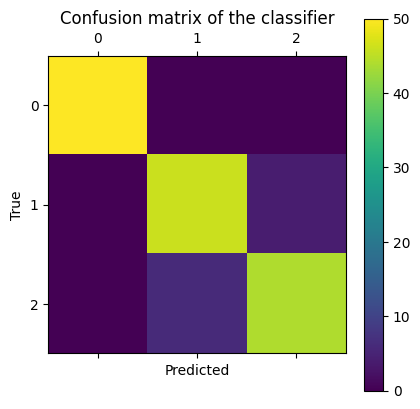

In [249]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")

pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()

### SMOTE

In [250]:
from imblearn.over_sampling import SMOTE

Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


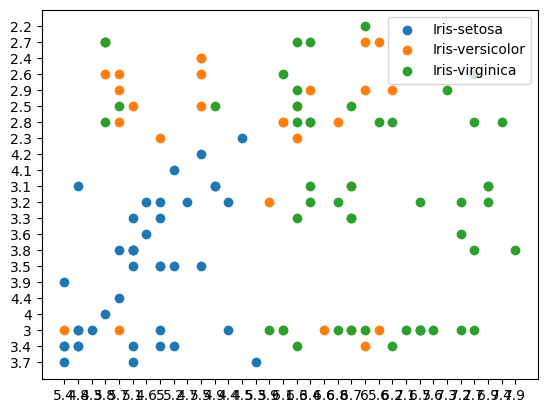

In [252]:
# define oversampling strategy
oversample = SMOTE()

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

counter = Counter(y_over)
# after- summarize class distribution
print(counter)

from matplotlib import pyplot
from collections import Counter
from numpy import where
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [253]:
expected = y_over
# define pipeline
steps = [('over', SMOTE()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [254]:
# evaluate pipeline
cv = KFold(n_splits=2,random_state=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
y_prediction = cross_val_predict(clf,X_over,y_over, cv=2)
acc_score = accuracy_score(expected, y_prediction)
score = mean(scores)

Accuracy score: 0.94
Score: 0.9583333333333334
Confusion matrix: 
[[50  0  0]
 [ 0 47  3]
 [ 0  6 44]]
Sum of matrix: 150


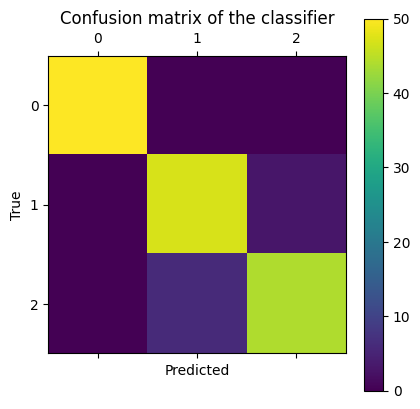

In [255]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()

#### ADASYN

In [268]:
from imblearn.over_sampling import ADASYN

print(Counter(y))
# define oversampling strategy
oversample = ADASYN(sampling_strategy="minority", random_state = 10)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

counter = Counter(y_over)
# after- summarize class distribution
print(counter)

Counter({'Iris-virginica': 50, 'Iris-setosa': 40, 'Iris-versicolor': 30})
Counter({'Iris-versicolor': 51, 'Iris-virginica': 50, 'Iris-setosa': 40})


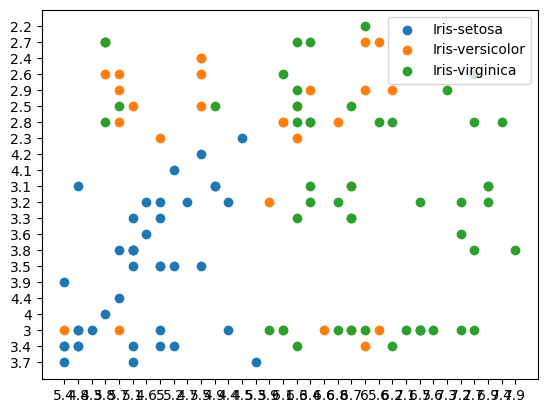

In [269]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [270]:
expected = y_over
# define pipeline
steps = [('over', ADASYN()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [271]:
# evaluate pipeline
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=2,random_state=5, shuffle=True)
y_prediction = cross_val_predict(clf,X_over,y_over, cv=2)
acc_score = accuracy_score(expected, y_prediction)

Accuracy score: 0.950354609929078
Score: 0.9583333333333334
Confusion matrix: 
[[40  0  0]
 [ 0 50  1]
 [ 0  6 44]]
Sum of matrix: 141


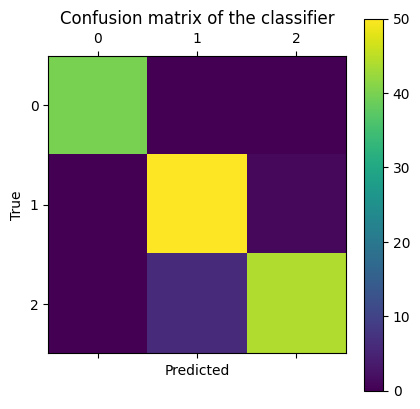

In [272]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()

## Part 3

### Random Undersampling

In [273]:
from collections import Counter
from itertools import count
from imblearn.under_sampling import RandomUnderSampler


# previous - summarize class distribution
print(f"Before sampling counter: {Counter(y)}")
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_under, y_under = oversample.fit_resample(X, y)

counter = Counter(y_under)
# after- summarize class distribution
print(f"After sampling counter: {counter}")

Before sampling counter: Counter({'Iris-virginica': 50, 'Iris-setosa': 40, 'Iris-versicolor': 30})
After sampling counter: Counter({'Iris-versicolor': 50, 'Iris-virginica': 50, 'Iris-setosa': 40})


In [274]:
expected = y_under
# define pipeline
steps = [('over', RandomUnderSampler()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [275]:
# evaluate pipeline
cv = KFold(n_splits=2,random_state=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
y_prediction = cross_val_predict(clf,X_under,y_under, cv=2)
acc_score = accuracy_score(expected, y_prediction)
score = mean(scores)

Accuracy score: 0.9357142857142857
Score: 0.9666666666666667
Confusion matrix: 
[[40  0  0]
 [ 0 47  3]
 [ 0  6 44]]
Sum of matrix: 140


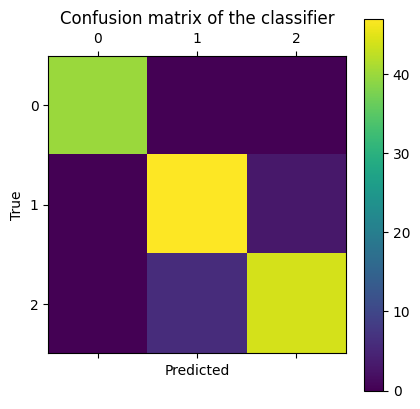

In [276]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()

### Cluster Undersampling

In [277]:
from imblearn.under_sampling import ClusterCentroids

# previous - summarize class distribution
print(f"Before sampling counter: {Counter(y)}")

cc = ClusterCentroids(random_state=42, sampling_strategy="all")

# fit and apply the transform
X_under, y_under = cc.fit_resample(X, y)

counter = Counter(y_under)
# after- summarize class distribution
print(f"After sampling counter: {counter}")


Before sampling counter: Counter({'Iris-virginica': 50, 'Iris-setosa': 40, 'Iris-versicolor': 30})
After sampling counter: Counter({'Iris-setosa': 30, 'Iris-versicolor': 30, 'Iris-virginica': 30})


In [278]:
expected = y_under
# define pipeline
steps = [('over', ClusterCentroids()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [279]:
# evaluate pipeline
cv = KFold(n_splits=2,random_state=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
y_prediction = cross_val_predict(clf,X_under,y_under, cv=2)
acc_score = accuracy_score(expected, y_prediction)
score = mean(scores)

Accuracy score: 0.9555555555555556
Score: 0.9583333333333334
Confusion matrix: 
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
Sum of matrix: 90


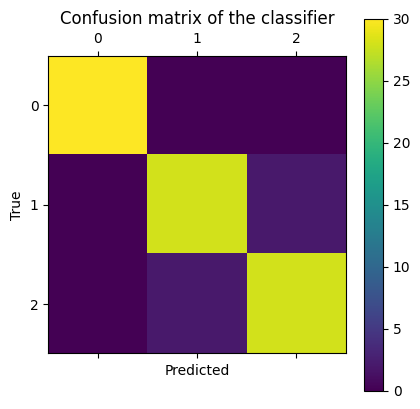

In [280]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()

### Tomek Links

In [281]:
from imblearn.under_sampling import TomekLinks

In [282]:
tl = TomekLinks(sampling_strategy='all')

# previous - summarize class distribution
print(f"Before sampling counter: {Counter(y)}")

# fit and apply the transform
X_under, y_under = cc.fit_resample(X, y)

counter = Counter(y_under)
# after- summarize class distribution
print(f"After sampling counter: {counter}")


Before sampling counter: Counter({'Iris-virginica': 50, 'Iris-setosa': 40, 'Iris-versicolor': 30})
After sampling counter: Counter({'Iris-setosa': 30, 'Iris-versicolor': 30, 'Iris-virginica': 30})


In [283]:
expected = y_under
# define pipeline
steps = [('over', TomekLinks()), ('model', MLPClassifier())]
pipeline = Pipeline(steps=steps)

In [284]:
# evaluate pipeline
cv = KFold(n_splits=2,random_state=5, shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
y_prediction = cross_val_predict(clf,X_under,y_under, cv=2)
acc_score = accuracy_score(expected, y_prediction)
score = mean(scores)

Accuracy score: 0.9555555555555556
Score: 0.9
Confusion matrix: 
[[30  0  0]
 [ 0 28  2]
 [ 0  2 28]]
Sum of matrix: 90


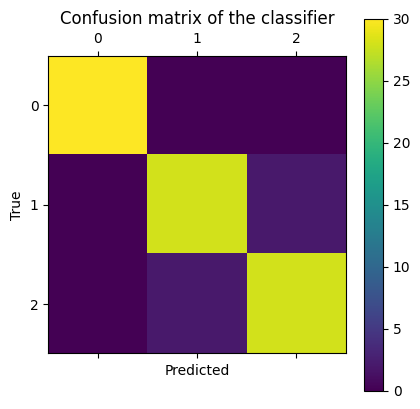

In [285]:
import pylab as pl

cm = confusion_matrix(expected, y_prediction)
print(f"Accuracy score: {acc_score}")
print(f"Score: {score}")
print(f"Confusion matrix: \n{cm}")
print(f"Sum of matrix: {cm.sum()}")


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.xlabel('Predicted')
pl.ylabel('True')

pl.colorbar()
pl.show()